# **مسئله 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 40240112093
a = 3
b = a-2
c = b-1
d = 9

In [7]:
def calculate_reward(button):
    if button == 1:
        return np.random.normal(a, 1)
    elif button == 2:
        return np.random.normal(b, np.sqrt(2))
    elif button == 3:
        return np.random.normal(c, 1)
    elif button == 4:
        return np.random.uniform(d, 1) if np.random.rand() > 0.7 else np.random.normal(d, np.sqrt(2))


## **الف)**

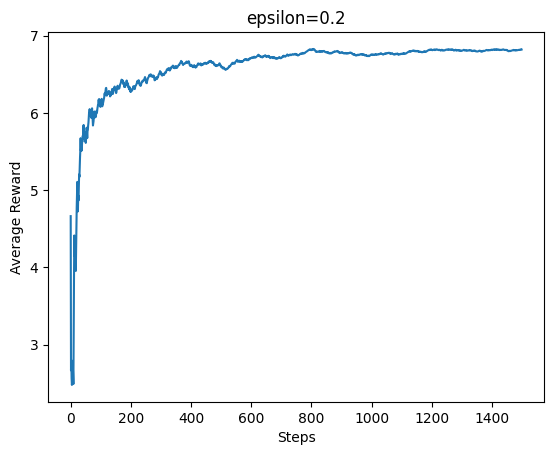

In [19]:
rewards = []
button_counts = np.zeros(4)
estimated_values = np.zeros(4)

i=0
while i<1500:
    random = np.random.random()
    if random < 0.2:
        action = np.random.randint(0, 4)
    else:
        action = np.argmax(estimated_values)

    reward = calculate_reward(action + 1)
    button_counts[action] += 1
    estimated_values[action] += (reward - estimated_values[action]) / button_counts[action]
    rewards.append(reward)
    i+=1

def show_reward_plot(rewards, steps, title):
  plt.figure()
  plt.plot(np.cumsum(rewards) / np.arange(1, steps + 1))
  plt.xlabel("Steps")
  plt.ylabel("Average Reward")
  plt.title(title)
  plt.show()

show_reward_plot(rewards, 1500, "epsilon=0.2")

## **ب)**

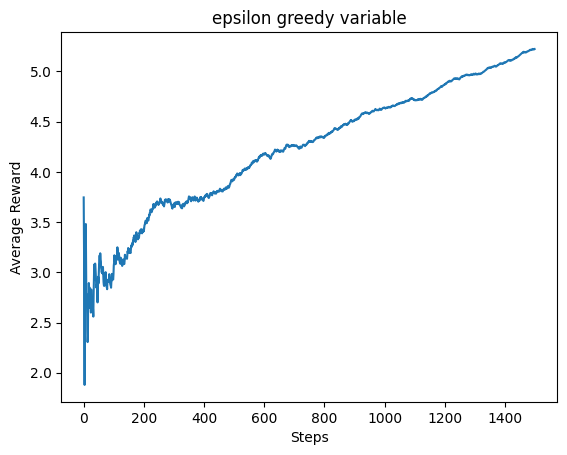

In [16]:
initial_eps = 1.0
final_eps = 0.1
decay_rate = 0.001

button_counts = np.zeros(4)
estimated_values = np.zeros(4)
rewards = []
eps = initial_eps

for i in range(1500):
    random = np.random.random()
    if random < eps:
        action = np.random.randint(0, 4)
    else:
        action = np.argmax(estimated_values)

    reward = calculate_reward(action + 1)
    button_counts[action] += 1
    estimated_values[action] += (reward - estimated_values[action]) / button_counts[action]
    rewards.append(reward)
    eps = max(final_eps, initial_eps * np.exp(-decay_rate * i))

show_reward_plot(rewards, 1500, "epsilon greedy variable")


## **پ)**

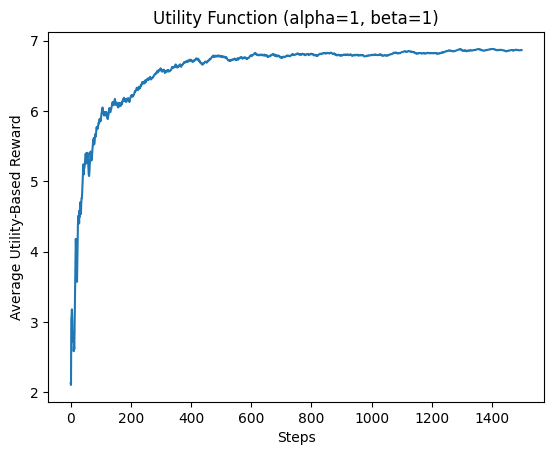

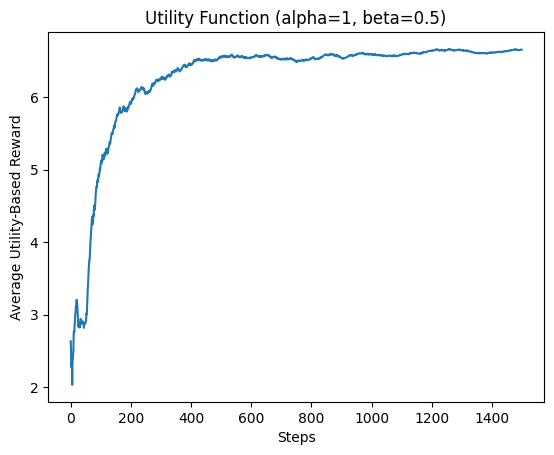

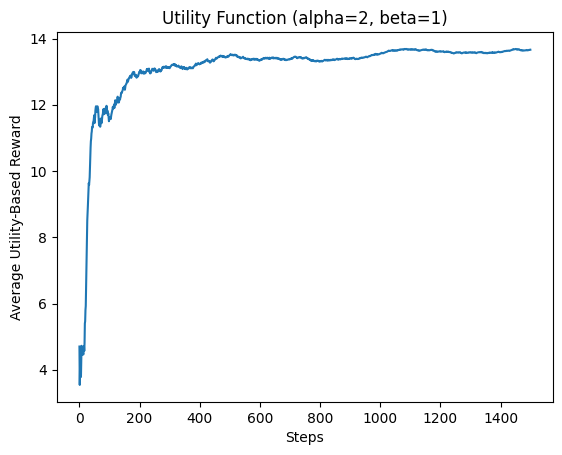

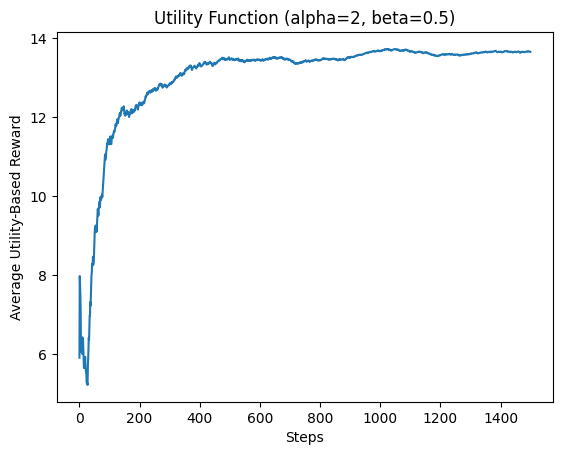

In [9]:
def utility_function(r, alpha, beta):
    return alpha * r if r >= 0 else beta * r

alpha_values = [1, 2]
beta_values = [1, 0.5]

def epsilon_greedy_with_utility(eps, alpha, beta):
  rewards = []
  button_counts = np.zeros(4)
  estimated_values = np.zeros(4)

  for i in range(1500):
      random = np.random.random()
      if random < eps:
          action = np.random.randint(0, 4)
      else:
          action = np.argmax(estimated_values)

      reward = calculate_reward(action + 1)
      utility_reward = utility_function(reward, alpha, beta)

      button_counts[action] += 1
      estimated_values[action] += (utility_reward - estimated_values[action]) / button_counts[action]
      rewards.append(utility_reward)

  return rewards

def show_reward_plot_with_utility(rewards, steps, alpha, beta):
    plt.figure()
    plt.plot(np.cumsum(rewards) / np.arange(1, steps + 1))
    plt.xlabel("Steps")
    plt.ylabel("Average Utility-Based Reward")
    plt.title(f"Utility Function (alpha={alpha}, beta={beta})")
    plt.show()

for alpha in alpha_values:
    for beta in beta_values:
        rewards = epsilon_greedy_with_utility(0.2, alpha, beta)
        show_reward_plot_with_utility(rewards, 1500, alpha, beta)